<a href="https://colab.research.google.com/github/IvanSalinas2000/Preprocesamiento-y-clasificacion-de-datos/blob/main/Proyecto/ProyectoChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip check


ipython 7.34.0 requires jedi, which is not installed.
datasets 3.4.1 has requirement fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.0.
google-cloud-aiplatform 1.84.0 has requirement google-cloud-storage<3.0.0dev,>=1.32.0, but you have google-cloud-storage 3.1.0.
google-cloud-aiplatform 1.84.0 has requirement protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1.
google-cloud-firestore 2.20.1 has requirement protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1.
google-cloud-pubsub 2.28.0 has requirement protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1.
google-cloud-bigtable 2.29.0 has requirement protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1.
tensorflow-metadata 1.16.1 has requirement protobuf<6.0.0dev,>=4.25.2; pyt

In [3]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.*
!pip install --upgrade transformers datasets


Found existing installation: protobuf 6.30.1
Uninstalling protobuf-6.30.1:
  Successfully uninstalled protobuf-6.30.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-aiplatform 1.84.0 requires google-cloud-storage<3.0.0dev,>=1.32.0, but you have google-cloud-storage 3.1.0 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0


In [1]:
# Instalar las librerías necesarias
!pip install rouge-score sacrebleu evaluate torchsummary
#https://www.kaggle.com/datasets/jpmiller/layoutlm/data

  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


In [2]:
!nvidia-smi


Fri Mar 21 16:57:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
# Importar librerías necesarias
import torch  #para aprendizaje profundo
import numpy as np
import pandas as pd
import re  # Expresiones regulares para procesamiento de texto
import tensorflow as tf
import evaluate  # Librería para métricas de evaluación
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  #suprimir advertencias

# Importar componentes de Transformers de Hugging Face
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer, DataCollatorForSeq2Seq, TrainerCallback, T5Config

# Importar librerías para manejo de datos
from datasets import Dataset

# dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#  para pérdida, optimización y manejo de datos
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from torch.utils.data import TensorDataset
from torchsummary import summary  # Resumen de modelos en PyTorch

# para manejar diccionarios con valores por defecto
from collections import defaultdict

# Suprimir advertencias para mantener la salida limpia
warnings.filterwarnings("ignore")

In [2]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('/content/medquad.csv')

# Mostrar una muestra de los datos para comprender su estructura
print("Muestra de Datos:")
print(df.head())

# Verificar valores nulos en el dataset
print("Valores Nulos en los Datos:")
print(df.isnull().sum())

# Lista de palabras clave para filtrar preguntas relevantes
question_words = ['what', 'who', 'why', 'when', 'where', 'how', 'is', 'are', 'does', 'do', 'can', 'will', 'shall']

# Convertir todas las preguntas a minúsculas para una filtración consistente
df['question'] = df['question'].str.lower()

# Filtrar filas donde la pregunta comience con una palabra clave
df = df[df['question'].str.split().str[0].isin(question_words)]

# Restablecer el índice después de la filtración
df = df.reset_index(drop=True)

# Verificar filas duplicadas en el dataset
duplicates = df.duplicated()
print(f"Número de filas duplicadas: {duplicates.sum()}")

# Eliminar filas duplicadas para asegurar la unicidad de los datos
df = df.drop_duplicates()

# Restablecer el índice después de eliminar duplicados
df.reset_index(drop=True, inplace=True)

# Eliminar columnas innecesarias ('source' y 'focus_area') para simplificar el dataset
df = df.drop(columns=['source', 'focus_area'])

# Mostrar información del dataset (columnas, tipos de datos y valores no nulos)
print("Información de la Tabla:")
print(df.info())

# Eliminar filas duplicadas basadas en las columnas 'question' y 'answer'
df = df.drop_duplicates(subset='question', keep='first').reset_index(drop=True)
df = df.drop_duplicates(subset='answer', keep='first').reset_index(drop=True)

# Eliminar filas con valores nulos en las columnas 'question' o 'answer'
df = df.dropna(subset=['question', 'answer']).reset_index(drop=True)

# Rellenar valores nulos restantes con cadenas vacías y convertir a tipo string
df['question'] = df['question'].fillna('').astype(str)
df['answer'] = df['answer'].fillna('').astype(str)

# Definir una función para limpiar el texto eliminando paréntesis y espacios adicionales
def clean_text(text):
    text = re.sub(r"\(.*?\)", "", text)  # Eliminar texto dentro de paréntesis
    text = re.sub(r'\s+', ' ', text.strip().lower())  # Normalizar espacios y convertir a minúsculas
    return text

# Aplicar la función de limpieza a las columnas 'question' y 'answer'
df['question'] = df['question'].apply(clean_text)
df['answer'] = df['answer'].apply(clean_text)

# Refinar aún más el texto asegurando minúsculas, eliminación de espacios y normalización
df['question'] = df['question'].str.lower().str.strip().apply(lambda x: re.sub(r'\s+', ' ', x))
df['answer'] = df['answer'].str.lower().str.strip().apply(lambda x: re.sub(r'\s+', ' ', x))

# Verificar valores nulos después de la limpieza
print("Valores Nulos en los Datos Después de la Limpieza:")
print(df.isnull().sum())

# Contar el número de preguntas y respuestas únicas en el dataset
print(f"Preguntas únicas: {df['question'].nunique()}")
print(f"Respuestas únicas: {df['answer'].nunique()}")

# Mostrar información final del dataset y una muestra de los datos limpiados
print("Información Final del Dataset:")
df.info()
print("Muestra de Datos Final:")
df.head()

Muestra de Datos:
                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  
Valores Nulos en los Datos:
question       0
answer         5
source         0
focus_area    14
dtype: int64
Número de filas duplicadas: 48
Información de la Tabla:
<class 'pandas.co

,question,answer
0,what is glaucoma ?,glaucoma is a group of diseases that can damag...
1,what causes glaucoma ?,"nearly 2.7 million people have glaucoma, a lea..."
2,what are the symptoms of glaucoma ?,symptoms of glaucoma glaucoma can develop in o...
3,what are the treatments for glaucoma ?,"although open-angle glaucoma cannot be cured, ..."
4,who is at risk for glaucoma? ?,anyone can develop glaucoma. some people are a...


In [25]:
# Definir el nombre del modelo y cargar la configuración de T5-small
nombre_modelo = "t5-small"
configuracion = T5Config.from_pretrained(nombre_modelo)

# Personalizar la configuración
configuracion.dropout_rate = 0.1  # Establecer una tasa de dropout de 0.1 para regularización
configuracion.feed_forward_proj = "gelu"  # Usar activación GELU en las capas de feed-forward

# Cargar el modelo T5 pre-entrenado con la configuración personalizada
modelo = T5ForConditionalGeneration.from_pretrained(nombre_modelo, config=configuracion)

# Cargar el tokenizador del modelo T5
tokenizador = T5Tokenizer.from_pretrained(nombre_modelo)

# Ajustar explícitamente el tamaño del vocabulario del modelo al del tokenizador
modelo.resize_token_embeddings(len(tokenizador))

# Imprimir un resumen detallado de la arquitectura del modelo
print("\nResumen detallado del modelo:")
print("=" * 50)

def resumir_modelo_por_tipo(modelo):
    """
    Resume el modelo contando el número de capas y parámetros por tipo de capa.
    """
    resumen_capas = defaultdict(int)  # Cuenta el número de capas por tipo
    resumen_parametros = defaultdict(int)  # Cuenta el número de parámetros por tipo de capa

    for nombre, modulo in modelo.named_modules():
        tipo_capa = type(modulo).__name__  # Obtener el tipo del módulo actual
        resumen_capas[tipo_capa] += 1  # Incrementar el conteo de esta capa
        resumen_parametros[tipo_capa] += sum(p.numel() for p in modulo.parameters())  # Sumar parámetros

    # Imprimir la tabla de resumen
    print(f"{'Tipo de Capa':<30}{'Cantidad':<10}{'Parámetros':<15}")
    print("=" * 55)
    for tipo_capa, cantidad in resumen_capas.items():
        print(f"{tipo_capa:<30}{cantidad:<10}{resumen_parametros[tipo_capa]:<15,}")

resumir_modelo_por_tipo(modelo)

# Definir una función de preprocesamiento para la tarea seq2seq
def funcion_preprocesamiento(lote):
    """
    Preprocesa el conjunto de datos tokenizando las entradas y las etiquetas.
    """
    # Formatear las preguntas y respuestas
    entradas = [f"responde la siguiente pregunta: {q}" for q in lote['question']]
    etiquetas = [f"{a}" for a in lote['answer']]

    # Tokenizar las entradas
    entradas_modelo = tokenizador(
        entradas,
        max_length=128,  # Truncar o rellenar hasta una longitud máxima de 128
        truncation=True,
        padding="max_length",
        return_tensors="pt",
    )

    # Tokenizar las etiquetas
    with tokenizador.as_target_tokenizer():
        etiquetas_modelo = tokenizador(
            etiquetas,
            max_length=64,  # Truncar o rellenar hasta una longitud máxima de 64
            truncation=True,
            padding="max_length",
            return_tensors="pt",
        )

    # Reemplazar los tokens de padding con -100 para que sean ignorados por la función de pérdida
    etiquetas_modelo["input_ids"][etiquetas_modelo["input_ids"] == tokenizador.pad_token_id] = -100
    entradas_modelo["labels"] = etiquetas_modelo["input_ids"]
    return entradas_modelo

# Dividir el dataset en conjuntos de entrenamiento y validación
df_entrenamiento, df_validacion = train_test_split(df, test_size=0.15, random_state=42)

# Convertir los DataFrames de pandas en objetos Dataset de Hugging Face
dataset_entrenamiento = Dataset.from_pandas(df_entrenamiento)
dataset_validacion = Dataset.from_pandas(df_validacion)

# Preprocesar los datasets de entrenamiento y validación
dataset_entrenamiento = dataset_entrenamiento.map(
    funcion_preprocesamiento,
    batched=True,
    batch_size=32,  # Procesar en lotes de 32
    remove_columns=dataset_entrenamiento.column_names,  # Eliminar columnas originales
    num_proc=2,
)

dataset_validacion = dataset_validacion.map(
    funcion_preprocesamiento,
    batched=True,
    batch_size=32,
    remove_columns=dataset_validacion.column_names,
    num_proc=2,

)

# Definir los argumentos de entrenamiento
argumentos_entrenamiento = Seq2SeqTrainingArguments(
    output_dir="./resultados",
    resume_from_checkpoint=None,
    evaluation_strategy="epoch",
    save_total_limit=1,
    learning_rate=5e-4,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    lr_scheduler_type="cosine_with_restarts",
    warmup_ratio=0.1,
    weight_decay=0.05,
    predict_with_generate=True,
    fp16=True,
    logging_dir="./logs",
    logging_steps=200,
    metric_for_best_model="exact_match",
    greater_is_better=True,
    report_to="none",
    gradient_accumulation_steps=2,
    max_grad_norm=0.5,
    optim="adamw_torch_fused",
    generation_max_length=64,
    generation_num_beams=6,
    dataloader_num_workers=4,
    group_by_length=False,
    remove_unused_columns=True,
    label_smoothing_factor=0.1,
)

# Inicializar el data collator para tareas seq2seq
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizador,
    model=modelo,
    padding='longest',
    return_tensors="pt",
)

# Definir la función para calcular métricas de evaluación
def calcular_metricas(eval_pred, tokenizador):
    """
    Calcula las métricas Exact Match, BLEU y ROUGE-L.
    """
    predicciones, etiquetas = eval_pred
    pred_decodificadas = tokenizador.batch_decode(predicciones, skip_special_tokens=True)
    etiquetas = np.where(etiquetas != -100, etiquetas, tokenizador.pad_token_id)
    etiquetas_decodificadas = tokenizador.batch_decode(etiquetas, skip_special_tokens=True)

    exact_match = np.mean([p == l for p, l in zip(pred_decodificadas, etiquetas_decodificadas)])
    bleu = evaluate.load("bleu").compute(predictions=pred_decodificadas, references=[[l] for l in etiquetas_decodificadas])["bleu"]
    rouge = evaluate.load("rouge").compute(predictions=pred_decodificadas, references=etiquetas_decodificadas)["rougeL"]

    return {"exact_match": exact_match, "BLEU": bleu, "ROUGE-L": rouge}

# Entrenar el modelo
entrenador = Seq2SeqTrainer(
    model=modelo,
    args=argumentos_entrenamiento,
    train_dataset=dataset_entrenamiento,
    eval_dataset=dataset_validacion,
    tokenizer=tokenizador,
    data_collator=data_collator,
    compute_metrics=lambda eval_pred: calcular_metricas(eval_pred, tokenizador),
)

entrenador.train()
#entrenador.train(resume_from_checkpoint="./resultados/checkpoint-4416")


# guardar el modelo entrenado y el tokenizador
entrenador.save_model("./t5_chatbot_model")
tokenizador.save_pretrained("./t5_chatbot_tokenizer")

# guardar modelo.state_dict
model_path = "./t5_chatbot_model.h5"
torch.save(modelo.state_dict(), model_path)

# guardar el training log history
log_history = entrenador.state.log_history


Resumen detallado del modelo:
Tipo de Capa                  Cantidad  Parámetros     
T5ForConditionalGeneration    1         60,492,288     
Embedding                     3         16,435,712     
T5Stack                       2         76,927,488     
ModuleList                    14        88,112,128     
T5Block                       12        44,056,064     
T5LayerSelfAttention          12        12,589,568     
T5Attention                   18        18,874,880     
Linear                        97        60,475,392     
T5LayerNorm                   32        16,384         
Dropout                       44        0              
T5LayerFF                     12        25,171,968     
T5DenseActDense               12        25,165,824     
ReLU                          12        0              
T5LayerCrossAttention         6         6,294,528      


Map (num_proc=2):   0%|          | 0/11778 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/2079 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Exact Match,Bleu,Rouge-l
1,3.357700,3.169721,0.139971,0.279482,0.398977
2,3.066000,3.028681,0.141414,0.297903,0.409389


In [26]:
ls ./resultados/


checkpoint-2208/


In [ ]:
!rm -rf ./resultados/trainer_state.json

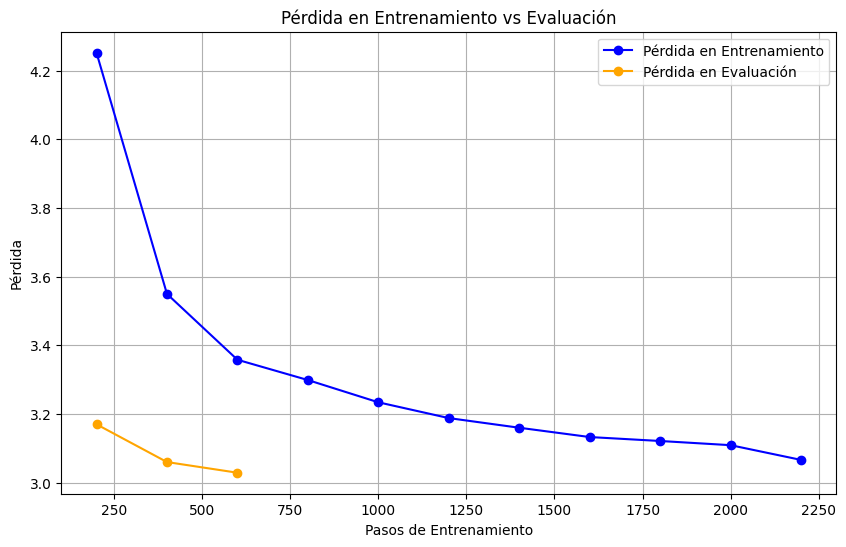

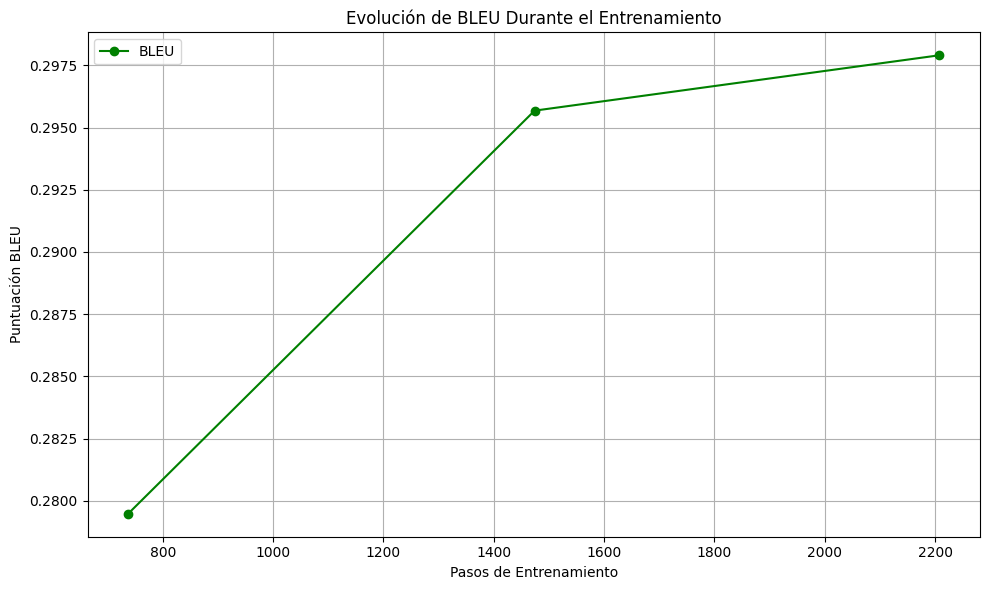

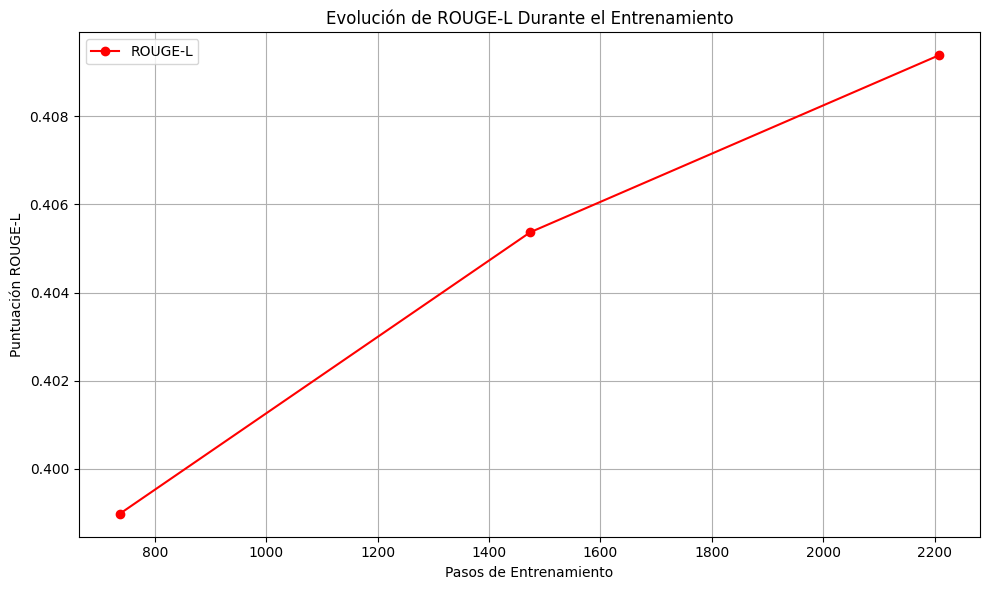

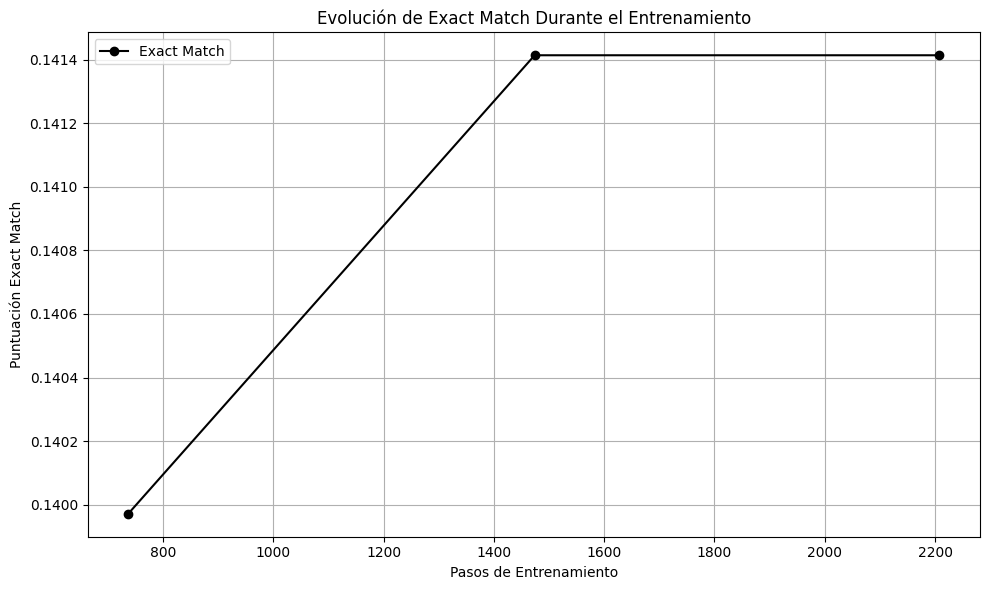

In [27]:
# Inicializar listas para almacenar métricas de entrenamiento y evaluación
train_loss = []  # Pérdida durante el entrenamiento
eval_loss = []  # Pérdida durante la evaluación
eval_bleu = []  # Puntuación BLEU en la evaluación
eval_exact_match = []  # Puntuación Exact Match en la evaluación
eval_rogue = []  # Puntuación ROUGE-L en la evaluación
steps = []  # Número de pasos de entrenamiento
eval_steps = []  # Número de pasos en la evaluación
# Extraer métricas del historial de entrenamiento
for log in log_history:
    if "loss" in log:  # Si hay pérdida en el registro de entrenamiento
        train_loss.append(log["loss"])  # Guardar la pérdida de entrenamiento
        steps.append(log["step"])  # Guardar el número de paso correspondiente
    if "eval_loss" in log:  # Si hay pérdida en la evaluación
        eval_loss.append(log["eval_loss"])  # Guardar la pérdida de evaluación
        eval_steps.append(log["step"])  # Guardar el número de paso correspondiente
    if "eval_BLEU" in log:  # Si hay puntuación BLEU en la evaluación
        eval_bleu.append(log["eval_BLEU"])  # Guardar la puntuación BLEU
    if "eval_ROUGE-L" in log:  # Si hay puntuación ROUGE-L
        eval_rogue.append(log["eval_ROUGE-L"])  # Guardar la puntuación ROUGE-L
    if "eval_exact_match" in log:  # Si hay puntuación Exact Match
        eval_exact_match.append(log["eval_exact_match"])  # Guardar la puntuación Exact Match
# Gráfico de la pérdida en entrenamiento vs evaluación
plt.figure(figsize=(10, 6))
plt.plot(steps, train_loss, label="Pérdida en Entrenamiento", color="blue", marker="o")
plt.plot(steps[:len(eval_loss)], eval_loss, label="Pérdida en Evaluación", color="orange", marker="o")
plt.xlabel("Pasos de Entrenamiento")
plt.ylabel("Pérdida")
plt.title("Pérdida en Entrenamiento vs Evaluación")
plt.legend()
plt.grid(True)
plt.show()
# Gráfico de la puntuación BLEU
plt.figure(figsize=(10, 6))
plt.plot(eval_steps, eval_bleu, label="BLEU", marker="o", linestyle="-", color="green")
plt.xlabel("Pasos de Entrenamiento")
plt.ylabel("Puntuación BLEU")
plt.title("Evolución de BLEU Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Gráfico de la puntuación ROUGE-L
plt.figure(figsize=(10, 6))
plt.plot(eval_steps, eval_rogue, label="ROUGE-L", marker="o", linestyle="-", color="red")
plt.xlabel("Pasos de Entrenamiento")
plt.ylabel("Puntuación ROUGE-L")
plt.title("Evolución de ROUGE-L Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Gráfico de la puntuación Exact Match
plt.figure(figsize=(10, 6))
plt.plot(eval_steps, eval_exact_match, label="Exact Match", marker="o", linestyle="-", color="black")
plt.xlabel("Pasos de Entrenamiento")
plt.ylabel("Puntuación Exact Match")
plt.title("Evolución de Exact Match Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import os
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Definir rutas del modelo y del tokenizador guardados
model_path = "/content/t5_chatbot_model"
tokenizer_path = "/content/t5_chatbot_tokenizer"

# Verificar si las rutas existen
if not os.path.exists(model_path) or not os.path.exists(tokenizer_path):
    raise FileNotFoundError("Model or tokenizer path does not exist. Check file paths.")

# Cargar el tokenizador desde la ruta guardada
tokenizer = T5Tokenizer.from_pretrained(tokenizer_path)

# Cargar el modelo desde la ruta guardada
model = T5ForConditionalGeneration.from_pretrained(model_path)

# Configurar el modelo en modo de evaluación
model.eval()

def generate_response_top_k_top_p(
    question, model, tokenizer, max_length=64, top_k=50, top_p=0.95, temperature=1.0
):
    """
    Genera una respuesta a una pregunta dada usando muestreo Top-K y Top-P.

    Args:
        question (str): Pregunta de entrada a la que se generará una respuesta.
        model (T5ForConditionalGeneration): Modelo T5 preentrenado.
        tokenizer (T5Tokenizer): Tokenizador del modelo T5.
        max_length (int): Longitud máxima de la respuesta generada.
        top_k (int): Número de tokens con mayor probabilidad a considerar en Top-K.
        top_p (float): Umbral de probabilidad acumulativa en Top-P (nucleus sampling).
        temperature (float): Controla la aleatoriedad en el muestreo (mayor = más aleatorio).

    Returns:
        str: La respuesta generada.
    """
    # Formatear la pregunta para el modelo
    formatted_question = f"Answer the following question: {question}"

    # Tokenizar la pregunta de entrada
    inputs = tokenizer(
        formatted_question,
        return_tensors="pt",  # Retornar tensores de PyTorch
        padding=True,  # Añadir padding a las secuencias
        truncation=True,  # Truncar secuencias más largas que max_length
        max_length=128,  # Longitud máxima de la secuencia de entrada
    )

    # Generar una respuesta usando muestreo Top-K y Top-P
    outputs = model.generate(
        input_ids=inputs["input_ids"],  # IDs de los tokens de entrada
        attention_mask=inputs["attention_mask"],  # Máscara de atención
        max_length=max_length,  # Longitud máxima de la respuesta generada
        do_sample=True,  # Habilitar muestreo en lugar de búsqueda codiciosa o por haz (beam search)
        top_k=top_k,  # Muestreo Top-K: considerar los k tokens más probables
        top_p=top_p,  # Muestreo Top-P: considerar el menor conjunto de tokens cuya probabilidad acumulada sea >= top_p
        temperature=temperature,  # Control de aleatoriedad en la generación
        pad_token_id=tokenizer.pad_token_id,  # ID del token de padding
    )

    # Decodificar la respuesta generada en una cadena legible
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

# Ejemplo de uso de la función
try:
    question = "What is Alzheimer's?"
    response = generate_response_top_k_top_p(question, model, tokenizer)
    print("Question:", question)
    print("Response:", response)
except Exception as e:
    print(f"Error generating response: {e}")

Question: What is Alzheimer's?
Response: Alzheimer's is a type of disease. it affects your brain and nervous system. it is common in a person with Alzheimer. it is caused by mutations in the ltp1 gene. some people have genetic problems based on their genetics and genetics., most people


In [37]:
# Define una pregunta en ingles
question = "what is glaucoma?"
response = generate_response_top_k_top_p(question, model, tokenizer)

# Imprimir la pregunta y la respuesta generada
print("Question:", question)
print("Response:", response)

Question: what is glaucoma?
Response: glaucoma is a type of tumor that stretches towards the middle of the head. you can also see glaucoma in the hair, scalp, abdomen, elbow, and leg. glaucoma usually causes the eye to stop and rip or get it.


------